# 0.0 Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/Immoweb_scraping_result.csv')
print(df.dtypes)

id                                    int64
Locality                              int64
Type of property                     object
Subtype of property                  object
Price                                 int64
Type of sale                         object
Number of rooms                       int64
Living Area                         float64
Fully equipped kitchen              float64
Furnished                           float64
Fireplace                             int64
Terrace                             float64
Terrace area                        float64
Garden                              float64
Garden area                         float64
Surface of the land                 float64
Surface area of the plot of land    float64
Number of facades                   float64
Swimming pool                       float64
State of the building                object
Compound Listing                     object
dtype: object


# 2.6.1 : How many qualitative and quantitative variables are there?

The columns are considered quantitative if they are assigned a value from a discrete set. For example 'Locality' is a categorical variable because every entry comes from a discrete (finite) set of codes.

In [3]:
# How many quantitavie and qualitative variables are there?
quantitative_columns = ['Price', 'Number_of_rooms', 'Living_Area', 'Terrace_area', 'Garden_area', 'Surface_of_the_land'\
                       , 'Surface_area_of_the_plot_of_land', 'Number_of_facades']
qualitative_columns = ['id', 'Locality', 'Type of property', 'Subtype of property', 'Type of sale', 'Fully equipped kitchen', 'Furnished',\
                       'Fireplace', 'Terrace', 'Garden', 'Swimming pool', 'State of the building', 'Compound Listing']

print(f'The dataset contains a total of {len(df.columns)} columns and {df.shape[0]} rows.')
print(f'Out of the {len(df.columns)} columns {len(quantitative_columns)} are quantitative variables.')
print(f'Out of the {len(df.columns)} columns {len(qualitative_columns)} are qualitative variables.')

The dataset contains a total of 21 columns and 15516 rows.
Out of the 21 columns 8 are quantitative variables.
Out of the 21 columns 13 are qualitative variables.


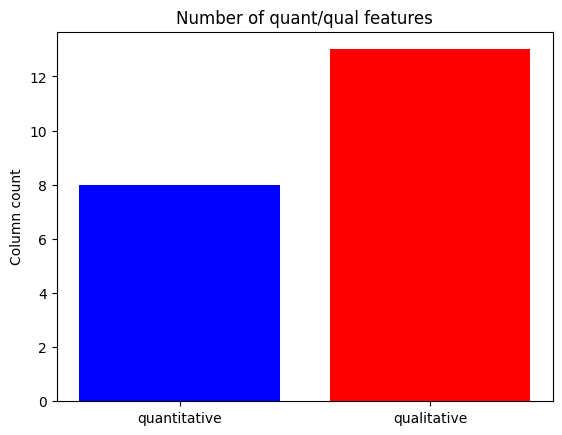

In [4]:
variables = ['quantitative', 'qualitative']
counts = [len(quantitative_columns), len(qualitative_columns)]
fig, ax = plt.subplots()
ax.bar(variables, counts, color=['blue', 'red'])
ax.set_ylabel('Column count')
ax.set_title('Number of quant/qual features')
plt.show()

# 2.6.2 How would you transform these values into numerical values?

There are two popular ways of doing this: using an ordinal encoding, and using a one-hot encoding. Ordinal encoding assigns a unique integer to every category. One hot encoding creates a binary feature for every category. Both have their advantages and disadvantages:

- One hot encoding creates extra features making any model fitting more expensive.
- Oridnal encoding can suffer a small accuracy loss in shallow models.

Some columns in the dataset have already been transformed during cleaning, or some categorical columns (like 'id' or 'Locality') are already in integer form.

In [5]:
def ordinalEncode(entry, categories):
    for index, category in enumerate(categories):
        if entry == category:
            return index


def onehotEncode(entry, categories):
    pass

In [6]:
# Column of the categorical variables that need to be encoded
columns_to_be_encoded = ['Type of property', 'Subtype of property', 'Type of sale', 'State of the building', 'Compound Listing']

# Make dataframe with odrinal encoding
df1 = df.copy()
for column in columns_to_be_encoded:
    df1[column] = df[column].apply(lambda el: ordinalEncode(el, df[column].unique()))
    
# Make dataframe with one-hot encoding
df2 = df.copy()
for column in columns_to_be_encoded:
    dummy_data = pd.get_dummies(df[column])
    df2 = pd.concat([df2, dummy_data], axis=1)
df2.drop(columns_to_be_encoded, axis=1, inplace=True)
df2.columns

Index(['id', 'Locality', 'Price', 'Number of rooms', 'Living Area',
       'Fully equipped kitchen', 'Furnished', 'Fireplace', 'Terrace',
       'Terrace area', 'Garden', 'Garden area', 'Surface of the land',
       'Surface area of the plot of land', 'Number of facades',
       'Swimming pool', 'APARTMENT', 'HOUSE', 'APARTMENT', 'APARTMENT_BLOCK',
       'BUNGALOW', 'CASTLE', 'CHALET', 'COUNTRY_COTTAGE', 'DUPLEX',
       'EXCEPTIONAL_PROPERTY', 'FARMHOUSE', 'FLAT_STUDIO', 'GROUND_FLOOR',
       'HOUSE', 'KOT', 'LOFT', 'MANOR_HOUSE', 'MANSION', 'MIXED_USE_BUILDING',
       'OTHER_PROPERTY', 'PENTHOUSE', 'SERVICE_FLAT', 'TOWN_HOUSE', 'TRIPLEX',
       'VILLA', 'residential_sale', 'AS_NEW', 'GOOD', 'JUST_RENOVATED',
       'TO_BE_DONE_UP', 'TO_RENOVATE', 'TO_RESTORE', 'compound', 'single'],
      dtype='object')

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

HYPERPARAMS = {'hidden_layer_sizes': (100,), 'alpha': 1e-8, 'max_iter': 10000, 'random_state': 1, 'activation': 'relu'\
              ,'early_stopping': False}

# Prepare dataset that uses oridinal encoding
data = df1.fillna(0)
X = data[[col for col in data.columns if col != 'Price']] #Price will be the target variable
Y = data['Price']
print("Shape of train and test data: ", X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)


# Train model on data encoded using ordinalEncoding
model = MLPRegressor(**HYPERPARAMS).fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("Score of a model where the data is using ordinalEncode: ", score)

# Prepare dataset that uses oridinal encoding
data = df2.fillna(0)
X = data[[col for col in data.columns if col != 'Price']] #Price will be the target variable
Y = data['Price']
print("Shape of train and test data: ", X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# Train model on data encoded using onehotEncoding
model = MLPRegressor(**HYPERPARAMS).fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("Score of a model where the data is using onehotEncode: ", score)

Shape of train and test data:  (15516, 20) (15516,)
Score of a model where the data is using ordinalEncode:  0.024069269250834413
Shape of train and test data:  (15516, 53) (15516,)
Score of a model where the data is using onehotEncode:  -0.001369430606972477


# 2.7 What is the percentage of missing values per column?